<a href="https://colab.research.google.com/github/eecastillo/parkinson_analisis/blob/master/notebooks/Parkinson_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
import pickle


In [ ]:
df = pd.read_csv('./parkinson_dataset.csv')
#df = pd.read_csv('./train_data.csv')
df.head(10)

,ID,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimer_local_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimer_dda,ac,nth,htn,median_pitch,mean_pitch,standard_deviation,minimum_pitch,maximum_pitch,number_pulses,periods,mean_period,std_period,locally_unvoiced_frames,voice_breaks,degree_voice_break,class_information
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576,3.223,0.996050,0.003967,24.204,186.266,186.300,0.859,184.502,187.880,183,182,0.005368,0.000025,0.0,0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,1.835,0.998471,0.001531,28.729,200.577,200.477,0.755,198.665,202.214,194,193,0.004988,0.000020,0.0,0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,1.891,0.998021,0.001984,27.349,202.868,202.425,1.860,197.220,206.060,198,197,0.004940,0.000046,0.0,0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,1.667,0.999154,0.000847,32.114,204.027,204.090,0.931,202.324,206.182,200,199,0.004900,0.000023,0.0,0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,1.599,0.999295,0.000706,32.816,207.519,207.468,0.880,205.407,209.927,204,203,0.004820,0.000022,0.0,0,0.0,1
5,1,0.208,0.000009,0.077,0.095,0.230,1.241,0.109,0.487,0.715,1.568,1.461,0.998378,0.001631,30.960,224.812,226.435,6.224,218.455,243.523,221,220,0.004416,0.000120,0.0,0,0.0,1
6,2,1.137,0.000102,0.643,0.506,1.929,6.993,0.620,3.394,4.156,6.189,10.183,0.933691,0.078360,13.196,111.318,111.054,4.301,97.914,119.037,110,109,0.009014,0.000370,0.0,0,0.0,1
7,2,0.606,0.000065,0.162,0.269,0.486,5.351,0.481,2.444,3.295,4.568,7.333,0.962727,0.040464,15.913,93.483,92.935,3.659,80.332,98.876,92,91,0.010768,0.000451,0.0,0,0.0,1
8,2,0.765,0.000081,0.204,0.311,0.611,5.314,0.461,2.492,3.469,5.992,7.477,0.940527,0.065536,12.954,93.239,93.811,3.686,88.629,104.526,93,92,0.010657,0.000411,0.0,0,0.0,1
9,2,0.374,0.000038,0.159,0.215,0.477,5.634,0.499,2.627,3.240,6.694,7.882,0.982695,0.017775,19.361,97.264,97.274,0.960,95.165,99.424,96,95,0.010280,0.000104,0.0,0,0.0,1


In [ ]:
df.shape

(1208, 28)

# Separación de sujeto de prueba

In [ ]:
sujeto_prueba = pd.DataFrame(df.iloc[1])
sujeto_prueba = sujeto_prueba.transpose()
#df = df.drop(labels=[0:5], axis=0)
df.drop(df.index[[0,1,2,3,4,5]], inplace=True)


In [ ]:
sujeto_prueba

,ID,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimer_local_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimer_dda,ac,nth,htn,median_pitch,mean_pitch,standard_deviation,minimum_pitch,maximum_pitch,number_pulses,periods,mean_period,std_period,locally_unvoiced_frames,voice_breaks,degree_voice_break,class_information
1,1.0,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,1.835,0.998471,0.001531,28.729,200.577,200.477,0.755,198.665,202.214,194.0,193.0,0.004988,0.00002,0.0,0.0,0.0,1.0


In [ ]:
sujeto_prueba_X = sujeto_prueba.drop(columns=['class_information','ID'])
sujeto_prueba_X

,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimer_local_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimer_dda,ac,nth,htn,median_pitch,mean_pitch,standard_deviation,minimum_pitch,maximum_pitch,number_pulses,periods,mean_period,std_period,locally_unvoiced_frames,voice_breaks,degree_voice_break
1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,1.835,0.998471,0.001531,28.729,200.577,200.477,0.755,198.665,202.214,194.0,193.0,0.004988,0.00002,0.0,0.0,0.0


In [ ]:
sujeto_prueba_X.shape

(1, 26)

# Resto de algoritmo

In [ ]:
X = df.drop(columns=['class_information','ID'])
y = df['class_information']

In [ ]:
X.head()

,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimer_local_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimer_dda,ac,nth,htn,median_pitch,mean_pitch,standard_deviation,minimum_pitch,maximum_pitch,number_pulses,periods,mean_period,std_period,locally_unvoiced_frames,voice_breaks,degree_voice_break
0,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576,3.223,0.996050,0.003967,24.204,186.266,186.300,0.859,184.502,187.880,183,182,0.005368,0.000025,0.0,0,0.0
1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,1.835,0.998471,0.001531,28.729,200.577,200.477,0.755,198.665,202.214,194,193,0.004988,0.000020,0.0,0,0.0
2,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,1.891,0.998021,0.001984,27.349,202.868,202.425,1.860,197.220,206.060,198,197,0.004940,0.000046,0.0,0,0.0
3,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,1.667,0.999154,0.000847,32.114,204.027,204.090,0.931,202.324,206.182,200,199,0.004900,0.000023,0.0,0,0.0
4,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,1.599,0.999295,0.000706,32.816,207.519,207.468,0.880,205.407,209.927,204,203,0.004820,0.000022,0.0,0,0.0


In [ ]:
X.shape

(1208, 26)

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class_information, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Import svm model
from sklearn import svm

In [ ]:
pip show sklearn

Name: sklearn
Version: 0.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://pypi.python.org/pypi/scikit-learn/
Author: UNKNOWN
Author-email: UNKNOWN
License: None
Location: /usr/local/lib/python3.7/dist-packages
Requires: scikit-learn
Required-by: 


In [ ]:
#Create a svm Classifier
clf = svm.SVC(C=10,gamma=0.0001,kernel='rbf') # Linear Kernel

In [ ]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

Reto 1 sesion 4 ML bedu

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
MSE = mean_squared_error(y_train,y_pred_train)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = clf.predict(X_test)
MSE = (mean_squared_error(y_test, y_pred))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =0.15384615384615385
Pruebas: MSE =0.29201101928374656


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7079889807162535


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7233009708737864
Recall: 0.7525252525252525


In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[108,  57],
       [ 49, 149]])

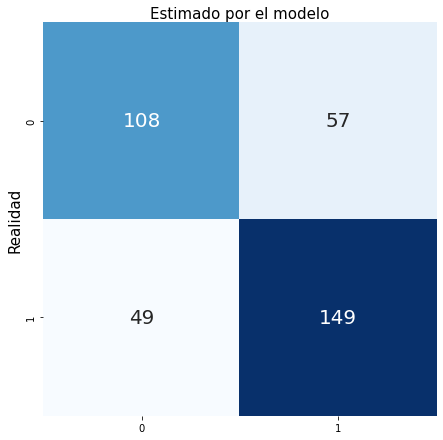

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [ ]:
y_train_pred = clf.decision_function(X_train)  
y_test_pred = clf.decision_function(X_test)  

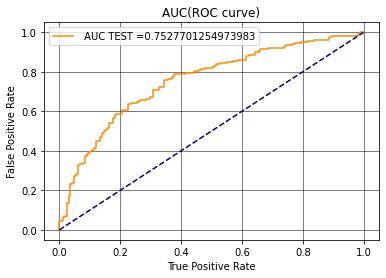

In [ ]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(test_fpr, test_tpr,color='darkorange', label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

#cross validation to get the best C, gamma and kernel

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0) # 50% training and 50% test

In [ ]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
scores = ['precision', 'recall']


In [ ]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(
        SVC(), tuned_parameters, scoring='%s_macro' % score
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

#practical

In [ ]:
df_audio=pd.read_csv('./audio_new_ethan_test.csv')


In [ ]:
df_audio

,Jitter (local):,"Jitter (local, absolute):",Jitter (rap):,Jitter (ppq5):,Jitter (ddp):,Shimmer (local):,"Shimmer (local, dB):",Shimmer (apq3):,Shimmer (apq5):,Shimmer (apq11):,Shimmer (dda):,Mean autocorrelation:,Mean noise-to-harmonics ratio:,Mean harmonics-to-noise ratio:,Median pitch:,Mean pitch:,Standard deviation:,Minimum pitch:,Maximum pitch:,Number of pulses:,Number of periods:,Mean period:,Standard deviation of period:,Fraction of locally unvoiced frames:,Number of voice breaks:,Degree of voice breaks:
0,0.00804,0.00008,0.00465,0.00437,0.01396,0.0754,0.7,0.04216,0.04382,0.05,0.12647,0.932847,0.084179,14.788,100.089,100.073,2.287,87.308,123.896,1746.0,1739.0,0.009993,0.00024,0.47692,6.0,0.45129


In [ ]:
df_audio.columns = list(X.columns)
df_audio

,jitter_local,jitter_local_absolute,jitter_rap,jitter_ppq5,jitter_ddp,shimmer_local,shimer_local_db,shimmer_apq3,shimmer_apq5,shimmer_apq11,shimer_dda,ac,nth,htn,median_pitch,mean_pitch,standard_deviation,minimum_pitch,maximum_pitch,number_pulses,periods,mean_period,std_period,locally_unvoiced_frames,voice_breaks,degree_voice_break
0,0.00804,0.00008,0.00465,0.00437,0.01396,0.0754,0.7,0.04216,0.04382,0.05,0.12647,0.932847,0.084179,14.788,100.089,100.073,2.287,87.308,123.896,1746.0,1739.0,0.009993,0.00024,0.47692,6.0,0.45129


In [ ]:
y_pred = clf.predict(df_audio)

In [ ]:
y_pred

array([0])

In [ ]:
if y_pred[0] == 1:
  print("Patient has some form of parkinson")
else:
  print("Patient does not have parkinson")

Patient does not have parkinson


# Save ML SVM trained model

In [ ]:
filename = 'parkinson_svm_model.sav'
pickle.dump(clf, open(filename, 'wb'))

NameError: ignored

In [ ]:
filename = 'https://github.com/eecastillo/parkinson_analisis/blob/master/python_code/parkinson_svm_model.sav'

loaded_model = pickle.load(open(filename, 'rb'))
prediction=loaded_model.predict(df_audio)


FileNotFoundError: ignored

In [ ]:
prediction

array([0])